### Polinomio 5° grado, massa fissa, Coltello 1

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [16]:
xx, yy, aa, bb, cc, dd, ee, ff = symbols('xx yy aa bb cc dd ee ff')

In [17]:
xdataor = np.array([18.2,28.2,38.2,48.2,58.2,68.2,78.2,88.2,98.2])/(10**2)
npoint = len(xdataor)
npoint
ax,bx = float(xdataor[0]),float(xdataor[npoint-1])
apx,bpx = 2./(bx-ax),(bx + ax)/(bx - ax)
print(ax)
print(bx)
print(apx)
print(bpx)
xdata = xdataor*apx - bpx
xdata
xdata=xdataor

0.182
0.982
2.5
1.4549999999999998


In [18]:
ydata = np.array([2.137,2.005,1.931,1.897,1.893,1.910,1.942,1.984,2.035])
yerr = np.array([0.001]*9)
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
#ydata

We want to find the parameters $a$,$b$,$c$ and $d$ of the cubic $y = d x^3 +c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - d x^3-c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

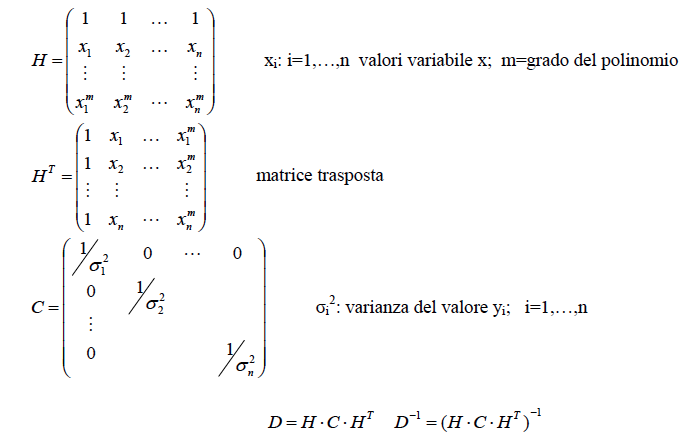

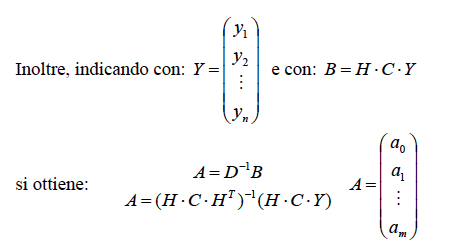

Calcolo matrice H e matrice trasposta

In [19]:
vect1=np.array([1]*9)
vect2=xdata
vect3=xdata**2
vect4=xdata**3
vect5=xdata**4
vect6=xdata**5
matH=np.matrix([vect1,vect2,vect3,vect4,vect5,vect6])
matHT = matH.T
#matH,matHT

calcolo matrice della varianza

In [20]:
varyinv = 1./(yerr*yerr)
matC=np.diag(varyinv)
#varyinv,matC

In [21]:
ydataprovv=ydata
matY=ydataprovv.reshape((-1, 1))
#matY

calcolo matrice A dei parametri

In [22]:
mat1=matH*matC*matHT
mat1_inv=np.linalg.inv(mat1)
mat2=matH*matC*matY
matA=np.dot(mat1_inv,mat2)
#matA

In [23]:
a, b, c, d, e, f = matA[0],matA[1],matA[2],matA[3],matA[4],matA[5]
print (" a = ", a)
print (" b = ", b)
print (" c = ", c)
print (" d = ", d)
print (" e = ", e)
print (" f = ", f)

 a =  [[2.59183617]]
 b =  [[-3.48594317]]
 c =  [[6.3314979]]
 d =  [[-5.45891095]]
 e =  [[2.57913752]]
 f =  [[-0.51282051]]


In [24]:
vara, varb, varc, vard, vare, varf = mat1_inv[0,0], mat1_inv[1,1], mat1_inv[2,2],mat1_inv[3,3],mat1_inv[4,4],mat1_inv[5,5]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
errd=np.sqrt(vard)
erre=np.sqrt(vare)
errf=np.sqrt(varf)
print (" errore su a = ",erra)
print (" errore su b = ",errb)
print (" errore su c = ",errc)
print (" errore su d = ",errd)
print (" errore su e = ",erre)
print (" errore su f = ",errf)

 errore su a =  0.0232138009422537
 errore su b =  0.27106011720672074
 errore su c =  1.145215374028451
 errore su d =  2.227038434881434
 errore su e =  2.0219294785426136
 errore su f =  0.693375245378588


Plot, adding extra points for the cubic.

In [25]:
thickxdata = np.arange(0.1,1.1,0.001)
thx2 = thickxdata**2
thx3 = thickxdata**3
thx4 = thickxdata**4
thx5 = thickxdata**5
thydata = f*thx5 + e*thx4 + d*thx3 + c*thx2 + b*thickxdata + a
thiyarr=np.array(thydata)
thickydata=thiyarr.T

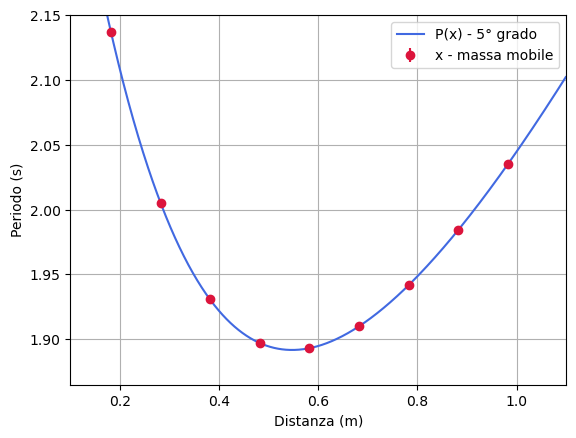

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel('Distanza (m)')
ax.set_ylabel('Periodo (s)')
ax.set_xlim(0.1, 1.1); ax.set_ylim(1.865, 2.15) 
plt.plot(thickxdata,thickydata, color="royalblue",label='P(x) - 5° grado')
plt.errorbar(xdata,ydata,yerr=yerr,fmt='o', label='x - massa mobile', color="crimson")
ax.grid()
ax.legend()
#plt.savefig("C1_Quintic.png")

In [27]:
x2=xdata**2
x3=xdata**3
x4=xdata**4
x5=xdata**5
thyatt=f*x5+e*x4+d*x3+c*x2+b*xdata+a
ydatatt=np.array(thyatt)
scarto1 = (ydata-ydatatt)/yerr
scarto2 = (ydata-ydatatt)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-4)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima = ",errst)

 Chi^2 =  0.4522144522214019
 errore standard della stima =  0.0003007372448571682


In [28]:
sum_y = (ydata).sum()
ymean=sum_y/npoint
ameany = ydata-ymean
vary = (ameany*ameany).sum()
scarto3=ydatatt-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print ("coefficiente determinazione = ",detercoeff)

coefficiente determinazione =  0.9999955385531731
